In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import scipy
%matplotlib inline  


# Question 1 Part 1

In [2]:
df = pd.read_csv("DF1.csv", usecols = [1,2,3,4])
corr = df.corr()
corr

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


This shows that the first and third columns have a correlation of approximately .99 and the second and fourth columns have a coorelation of approximately -.99

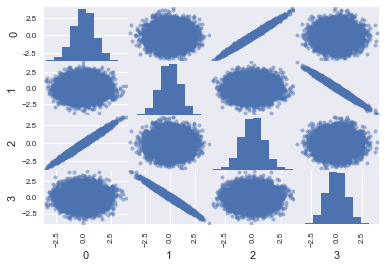

In [3]:
scatter_matrix(df)
plt.show()

This is using Pandas.

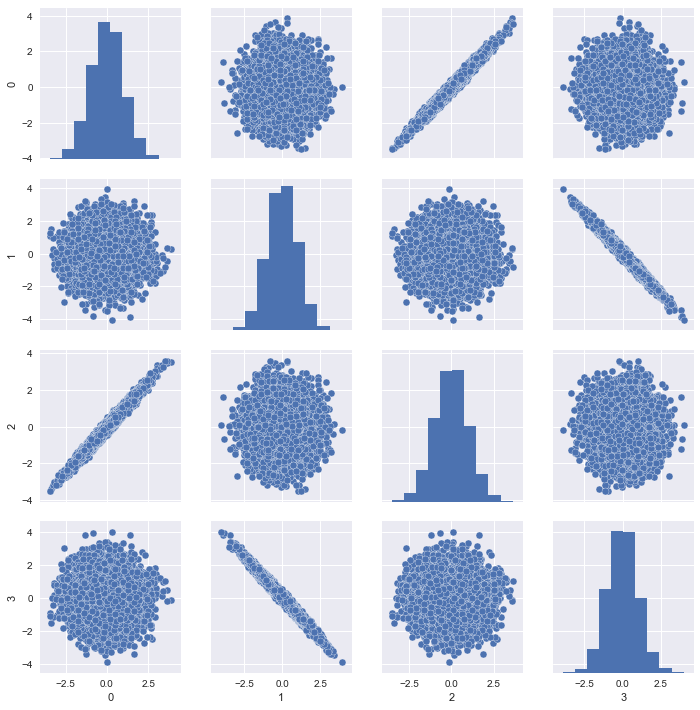

In [4]:
sns.pairplot(df)
plt.show()

This is using Seaborn.

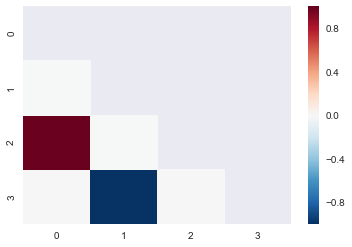

In [5]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask = mask)
plt.show()

In [6]:
Another way to use Seaborn.

SyntaxError: invalid syntax (<ipython-input-6-a4a92f5d17a8>, line 1)

# Quesiton 1 Part 2

In [7]:
df.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


This is calculated using the built in .cov function

In [8]:
mean0 = df['0'].mean()
mean1 = df['1'].mean()
mean2 = df['2'].mean()
mean3 = df['3'].mean()

cov00 = np.sum((df['0']-mean0)*(df['0']-mean0).T)/9999
cov01 = np.sum((df['0']-mean0)*(df['1']-mean0).T)/9999
cov02 = np.sum((df['0']-mean0)*(df['2']-mean0).T)/9999
cov03 = np.sum((df['0']-mean0)*(df['3']-mean0).T)/9999
cov11 = np.sum((df['1']-mean0)*(df['1']-mean0).T)/9999
cov12 = np.sum((df['1']-mean0)*(df['2']-mean0).T)/9999
cov13 = np.sum((df['1']-mean0)*(df['3']-mean0).T)/9999
cov22 = np.sum((df['2']-mean0)*(df['2']-mean0).T)/9999
cov23 = np.sum((df['2']-mean0)*(df['3']-mean0).T)/9999
cov33 = np.sum((df['3']-mean0)*(df['3']-mean0).T)/9999

array =[('0',[cov00,cov01,cov02,cov03]), ('1',[cov01,cov11,cov12,cov13]), ('2', [cov02,cov12,cov22,cov23]), ('3', [cov03,cov13,cov23,cov33])]
pd.DataFrame.from_items(array)

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005381,-0.004099,-0.995483
2,0.991624,-0.004099,1.001589,0.004083
3,0.004125,-0.995483,0.004083,1.005429


This is manually calculated. The numbers created fits with the plots in 1a because it shows that columns 0,2 have a covariance of .99 and columns 1,3 have a covariance of -.99. This shows the relationship between the columns.

# Question 1 Part 3

[[ 1.    0.    0.  ]
 [ 0.    1.    0.99]
 [ 0.    0.99  1.  ]]


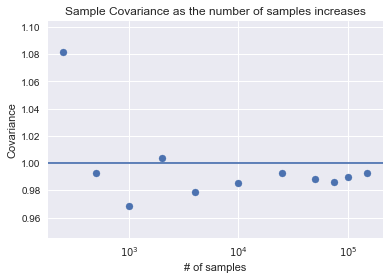

In [9]:
cov = [[1,0,0], [0, 1, .99], [0,.99,1]]
print(np.matrix(cov))
data = []

samples = [250, 500, 1000, 2000, 4000, 10000, 25000, 50000, 75000, 100000, 150000]
for sample in samples:
    var = np.random.multivariate_normal([0,0,0], cov, sample)
    cov1 = np.cov(var, rowvar=False)
    data.append(cov1[2][1])
plt.scatter(samples, data)
plt.axhline(y=1)
ax = plt.gca()
ax.set_xscale('log')
ax.set_ylabel('Covariance')
ax.set_xlabel('# of samples')
ax.set_title('Sample Covariance as the number of samples increases')
plt.show()

The actual covariance between X3 and X2 is .99. As the number of samples increases, the sample variance tends towards .99, which is the actual covariance.

# Question 2

In [10]:
df2 = pd.read_csv("DF2.csv", usecols=[1,2])
df2.head()

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932


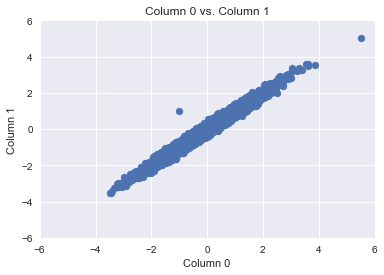

In [11]:
#ax = sns.regplot(x='0', y='1', data=df2)
plt.scatter(x = df2['0'], y = df2['1'])
ax = plt.gca()
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_ylabel('Column 1')
ax.set_xlabel('Column 0')
ax.set_title('Column 0 vs. Column 1')
plt.show()

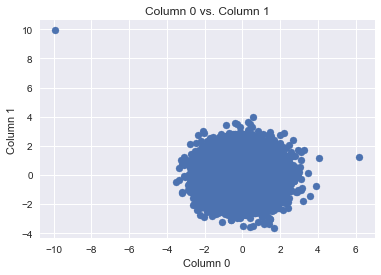

In [12]:
Q = scipy.linalg.inv(scipy.linalg.sqrtm(np.cov(df2, rowvar=False)))
Y = df2.dot(Q)
plt.scatter(Y.ix[:,0], Y.ix[:,1])
ax = plt.gca()
ax.set_ylabel('Column 1')
ax.set_xlabel('Column 0')
ax.set_title('Column 0 vs. Column 1')
plt.show()

The square root matrix of the covariance matrix of df2 creates the variable Q. We want to use the covariance of df2 because we want to solve (z^T*z)/n-1 = Q^T*Q. (z^T*z)/n-1 is the covariance of z, so the covariance of df2. Since we need to solve y= Q^-1 * z, we need to take the inverse of Q. Then we take the dot product of q inverse with z to get y, which is our transformed data set. 

# Question 3

In [13]:
error = []
for i in range(150):
    x = np.random.randn(150)
    e = np.random.randn(150)
    y = -3 + np.dot(x, 0) + e
    beta_hat = np.dot(x, y)/np.dot(x, x)
    error.append(beta_hat)    
np.std(error)

0.27465167690103698

The values of -.15 is not significant because we found that the standard deviation of the error is around .26. This is not precisie enough for us to say -.15 is significant. 

In [14]:
values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]
standard_dev = []
root_n = []
for value in values:
    error = []
    for i in range(value):
        x = np.random.randn(value)
        e = np.random.randn(value)
        y = -3 + np.dot(x, 0) + e
        beta_hat = np.dot(x, y)/np.dot(x, x)
        error.append(beta_hat)    
    standard_dev.append(np.std(error))
    root_n.append(1/np.sqrt(value))

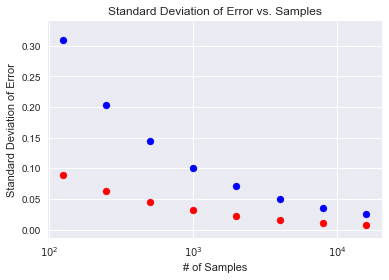

In [15]:
ax = plt.gca()
ax.scatter(values, standard_dev, c='b')
ax.scatter(values, root_n, c='r')
ax.set_xscale('log')
ax = plt.gca()
ax.set_ylabel('Standard Deviation of Error')
ax.set_xlabel('# of Samples')
ax.set_title('Standard Deviation of Error vs. Samples')
plt.show()

Blue is the standard deviation of the error and red is 1/root(n). As the number of samples increases, the standard deviation of the error goes towards zero.

# Question 4

In [16]:
import glob
from IPython.core.debugger import Tracer
import time

class Names:
    def __init__(self):
        
        #This function creates a Pandas Dataframe from all of the name files.
    
        self.index = []
        self.names = []
        self.sex = []
        self.count = []
        
        files = glob.glob('Names/*.txt')
        for fname in files:
            with open(fname) as f:
                year = fname.split('.')[0][-4:]
                data = f.readlines()
                for line in data:
                    name, sex, count = line.strip().split(',')
                    self.index.append(year)
                    self.names.append(name)
                    self.sex.append(sex)
                    self.count.append(int(count))
        test = [('year', self.index), ('names', self.names), ('sex', self.sex), ('count', self.count)]
        self.all_data = pd.DataFrame.from_items(test)
        
    def top_names_by_year(self, k, year):
        #Given values k and year, this function returns the 'k' most popular names in 'year'.
        test = self.all_data.loc[self.all_data['year'] == year]
        return test.nlargest(k, 'count')
    
    def frequency_of_name(self, name):
        #Given a value name, this function returns the # of females and males named 'name'.
        test1 = self.all_data.loc[self.all_data['names'] == name]
        testm = test1.loc[test1['sex'] == 'M']
        testf = test1.loc[test1['sex'] == 'F']
        print ('Females named ' + name + ': ' + str(testf['count'].sum(axis = 0)))
        print ('Males named ' + name + ': ' + str(testm['count'].sum(axis = 0)))
        
    def relative_frequency_of_name(self, name, year):
        #Given values name and year, this function calculates the percent of people assigned 'name' in 'year'.
        test2 = self.all_data.loc[self.all_data['year'] == year]
        total_names = test2['count'].sum(axis = 0)
        specific_name = test2.loc[test2['names'] == name]['count'].sum(axis = 0)
        print ('Frequency of ' + name + ' in ' + year + ': ' + str(specific_name/total_names))
                
    def switched_names(self, year1, year2):
        #Given valyes year1 and year2, this function calculates the names that switched popularity between genders
        #between 'year1' and 'year2'.
        #WARNING: TAKES VERY LONG TO RUN FOR FULL DATA SET
        woman_names = set()
        man_names = set()
        switched_names = set()
        
        data_copy = self.all_data
        
        start = time.time()
        for year in range(year1, year2):
            helper = data_copy.loc[self.all_data['year'] == str(year)]
            for name in helper['names']:
                helper1 = helper.loc[helper['names'] == name]
                if helper1.shape[0] == 2:
                    woman_count = helper1.iloc[0]['count']
                    man_count = helper1.iloc[1]['count']
                    if name in woman_names:
                        if man_count > woman_count:
                            switched_names.add(name)
                            data_copy = data_copy.loc[data_copy['names'] != name]
                            woman_names.remove(name)
                    elif name in man_names:
                        if woman_count > man_count:
                            switched_names.add(name)
                            data_copy = data_copy.loc[data_copy['names'] != name]
                            man_names.remove(name)
                    else:
                        if woman_count > man_count:
                            woman_names.add(name)
                        else:
                            man_names.add(name)
        print(switched_names)
        end = time.time()
        print('Elapsed time: '+ str(format(end-start, '.2f')) + ' seconds')
                    
name = Names()

# Top 10 names of 1950

In [17]:
name.top_names_by_year(10, '1950')

,year,names,sex,count
468037,1950,James,M,86266
468038,1950,Robert,M,83590
461924,1950,Linda,F,80439
468039,1950,John,M,79447
461925,1950,Mary,F,65485
468040,1950,Michael,M,65185
468041,1950,David,M,60761
468042,1950,William,M,60722
468043,1950,Richard,M,51028
461926,1950,Patricia,F,47952


# Frequency of Justin

In [18]:
name.frequency_of_name('Justin')

Females named Justin: 3785
Males named Justin: 766301


# Relative frequency of Jackson in 2000

In [19]:
name.relative_frequency_of_name('Jackson', '2000')

Frequency of Jackson in 2000: 0.00156673004537


# Names that switched gender popularity between 1880-1885

In [20]:
name.switched_names(1880, 1885)

{'Ocie', 'Dana', 'Marion', 'Tommie', 'Jimmie', 'Theo', 'Ossie', 'Lonie', 'Guadalupe', 'Sammie', 'Odie', 'Shirley', 'Fay', 'Dell', 'Erie', 'Byrd', 'Mannie'}
Elapsed time: 12.16 seconds


# Question 5 Part 1

In [21]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [22]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text,candidate
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...,"clinton,sanders"
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...,trump
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...,trump
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...,trump
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ...",trump


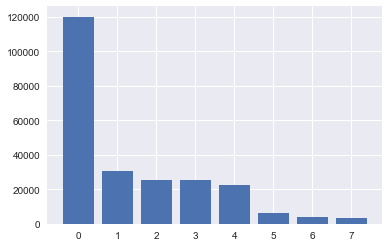

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [23]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

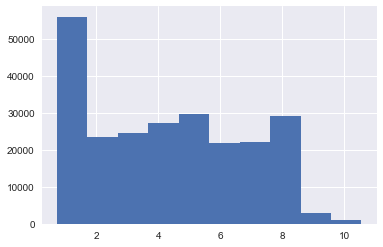

In [24]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

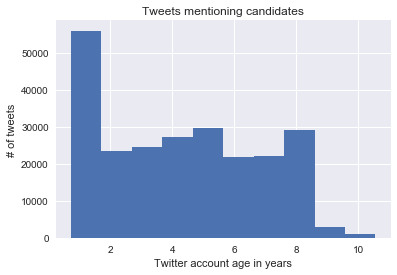

In [25]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

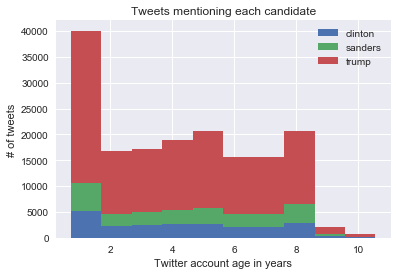

In [26]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

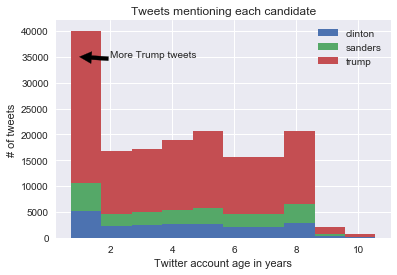

In [27]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

In [28]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

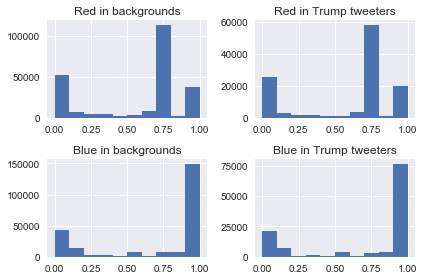

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [30]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
DEDC92         1
391E18         1
B40486         1
7A0421         1
803AB3         1
3A0B0B         1
DBEDC3         1
EDF5EB         1
E3E6FF         1
391852         1
365705         1
753C79         1
424445         1
053D14         1
FFA6D8         1
03254D         1
1E398C         1
C0C1C2         1
717813         1
11FA05         1
AD08FF         1
FAECEB         1
DB3039         1
2E1A80         1
FAAFD3         1
4558D6         1
03F8E1         1
E8EDF0        

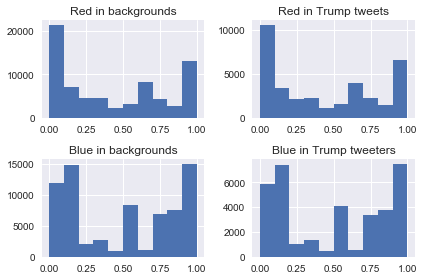

In [31]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

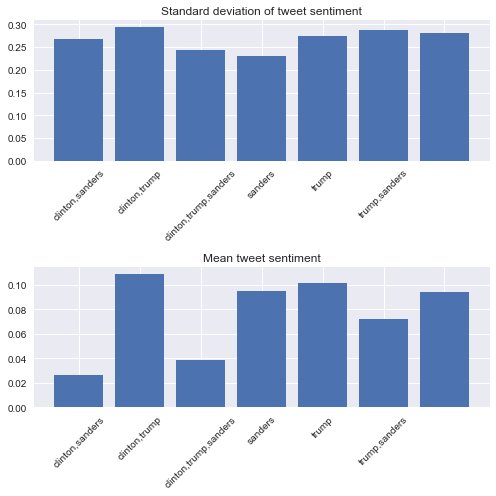

In [32]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [33]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

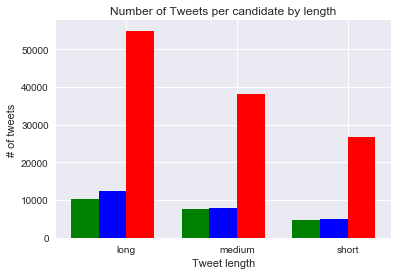

In [34]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

# Question 5 Part 2

In [35]:
tx_count = 0
ca_count = 0
fl_count = 0
ny_count = 0
for tweet in tweets['user_location']:
    try:
        if any(state in tweet for state in ['TX', 'tx', 'Texas', 'texas', 'Houston', 'Austin', 'Dallas', 'San Antonio', 'Fort Worth', 'Plano']):
            tx_count = tx_count + 1
        elif any(state in tweet for state in ['CA', 'ca', 'California', 'california', 'LA', 'Los Angeles' 'cali', 'SF', 'san francisco']):
            ca_count = ca_count + 1
        elif any(state in tweet for state in ['Florida', 'florida', 'FL', 'fl', 'miami', 'Miami', 'Orlando', 'Tampa']):
            fl_count = fl_count+1
        elif any(state in tweet for state in ['NY', 'NYC', 'ny', 'nyc', 'New York', 'new york', 'new york city', 'New York City', 'Brooklyn', 'brooklyn']):
            ny_count=ny_count+1
    except:
        pass
    

In [36]:
counts = [tx_count, ca_count, fl_count, ny_count]
counts

[8287, 17237, 7066, 9224]

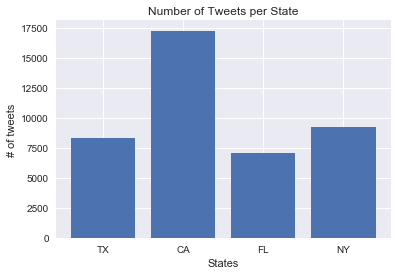

In [37]:
plt.bar(range(len(counts)), [tx_count, ca_count, fl_count, ny_count], tick_label=['TX','CA','FL','NY'])
ax = plt.gca()
ax.set_ylabel('# of tweets')
ax.set_xlabel('States')
ax.set_title('Number of Tweets per State')
plt.show()

I can do this for every state but it will take time to generate all the possible names for a state, so I have just plotted the top four most populous states. We can also use the user tweets and user descriptions to see if the user mentioned their location in their tweet; however, we would need to anazlye the tweet to make sure the person wasn't just saying the name of a place they don't live in.